In [1]:
'''Libraries for loading,manipulating and plotting data'''
import numpy as np    
import pandas as pd   
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import randint
'''Libraries for Machine Learning'''
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
import joblib

In [2]:
df = pd.read_csv("../preprocessed_data.csv")
df.head()

,Unnamed: 0,id,flair,title,body,num_cmnts,created,score,comments,url,combined_features,label,tokenized,stopwords_removed,polarity,word_count
0,0,fwjdqr,AskIndia,4 days ago we had pending orders of 100 millio...,we are getting frantic calls from our pharma ...,6,2020-04-07 20:07:04,96,modi has stockholm syndrome to be fair the ev...,https://www.reddit.com/r/india/comments/fwjdqr...,days ago we had pending orders of million h...,0,"['days', 'ago', 'we', 'had', 'pending', 'order...",days ago pending orders million hydroxychloroq...,0.146789,410
1,1,fizkkk,AskIndia,randians who were big time users of dating app...,i d my own stint with these apps a couple of m...,19,2020-03-15 18:48:06,20,someone matched with me just to tell me that ...,https://www.reddit.com/r/india/comments/fizkkk...,randians who were big time users of dating ap...,0,"['randians', 'who', 'were', 'big', 'time', 'us...",randians big time users dating apps like tinde...,0.103643,523
2,2,f25vx0,AskIndia,what does r india thinks about the flat earthers,i encountered a foreigner in ig who says round...,31,2020-02-11 17:10:55,7,i haven t found a indian yet who believes ear...,https://www.reddit.com/r/india/comments/f25vx0...,what does r india thinks about the flat earth...,0,"['what', 'does', 'r', 'india', 'thinks', 'abou...",r india thinks flat earthers encountered forei...,-0.029832,356
3,3,dtvliq,AskIndia,people who left their 9 to 5 jobs to pursue a ...,couldn t add askindia flair from the mobile br...,34,2019-11-09 20:57:35,43,an engineer doing advertisement shoots since ...,https://www.reddit.com/r/india/comments/dtvliq...,people who left their to jobs to pursue a c...,0,"['people', 'who', 'left', 'their', 'to', 'jobs...",people left jobs pursue career music art forms...,0.181008,456
4,4,b7pvwt,AskIndia,somebody want to kill my full family what to do,it s now 24hrs but local police station is not...,24,2019-04-01 01:00:35,96,calm down go to the sp office of your town fi...,https://www.reddit.com/r/india/comments/b7pvwt...,somebody want to kill my full family what to ...,0,"['somebody', 'want', 'to', 'kill', 'my', 'full...",somebody want kill full family hrs local polic...,0.012874,291


In [3]:
features = df['stopwords_removed']
labels = df['label']
flairs = df.flair.unique()
print(flairs)

['AskIndia' 'Non-Political' 'Scheduled' 'Photography' 'Coronavirus'
 'Science/Technology' 'Politics' 'Business/Finance' 'Policy/Economy'
 'Sports' 'Food']


Preprocessing the text data for input to models. Count Vectorizer is used to make a matrix of token counts. Then Tf-idf transformer is used to get the relevance of each word in the text. But sklearn comes with tfidfVectorizer which do both the steps so will be using this. Moreover it will be easy to store and later use it in the web app

In [17]:
tfidfVectorizer = joblib.load('../models/preprocessor.sav')
X = tfidfVectorizer.transform(features).toarray()
X_train, X_test , y_train, y_test = train_test_split(X, labels , test_size = 0.20,random_state=42,stratify=labels)

# Multinomial Naive Bayes
----

accuracy 0.6725490196078432
                    precision    recall  f1-score   support

          AskIndia       0.42      0.59      0.49        46
     Non-Political       0.89      0.37      0.52        43
         Scheduled       0.77      0.36      0.49        47
       Photography       0.80      0.84      0.82        44
       Coronavirus       0.92      0.72      0.81        50
Science/Technology       0.71      0.77      0.74        44
          Politics       0.53      0.76      0.62        50
  Business/Finance       0.71      0.72      0.72        47
    Policy/Economy       0.57      0.68      0.62        44
            Sports       0.74      0.74      0.74        46
              Food       0.74      0.82      0.78        49

          accuracy                           0.67       510
         macro avg       0.71      0.67      0.67       510
      weighted avg       0.71      0.67      0.67       510



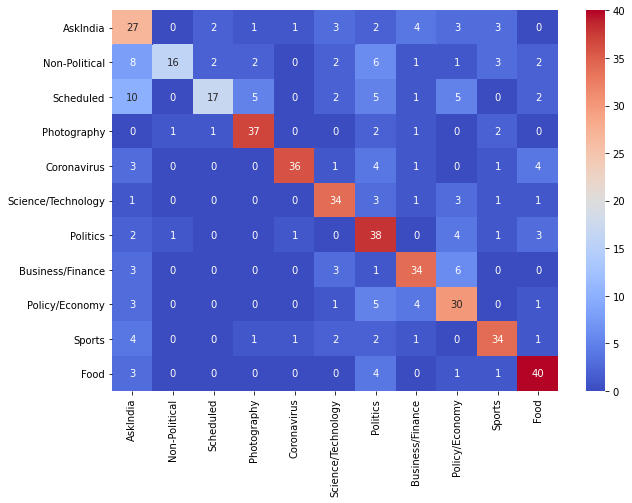

In [5]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('accuracy %s' % acc)
print(classification_report(y_test, y_pred,target_names=flairs))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in flairs],
                  columns = [i for i in flairs])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap='coolwarm')

best_acc = acc
best_model = nb

## Analysis for the above model
---
1. Model had an accuracy of approximately 67.25


2. Model did well on predicting Photography, Science/Technology,Coronavirus and Food flairs with good precision,recall and f1. Also the confusion matrix is also quite clean with some traces of misclassification.


3. Model did not performed well on the AskIndia flair with very low precision,recall and f1. It is also evident from the confusion matrix.


4. It performed average on all other flairs as depicted in the CM

# Linear SVM
---

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   25.2s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.5min finished


accuracy 0.8098039215686275
                    precision    recall  f1-score   support

          AskIndia       0.57      0.83      0.67        46
     Non-Political       0.78      0.88      0.83        43
         Scheduled       0.80      0.79      0.80        47
       Photography       0.93      0.89      0.91        44
       Coronavirus       0.84      0.94      0.89        50
Science/Technology       0.93      0.89      0.91        44
          Politics       0.79      0.54      0.64        50
  Business/Finance       0.82      0.70      0.76        47
    Policy/Economy       0.76      0.64      0.69        44
            Sports       0.98      0.87      0.92        46
              Food       0.84      0.96      0.90        49

          accuracy                           0.81       510
         macro avg       0.82      0.81      0.81       510
      weighted avg       0.82      0.81      0.81       510

Tuned SVC Parameters: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 3

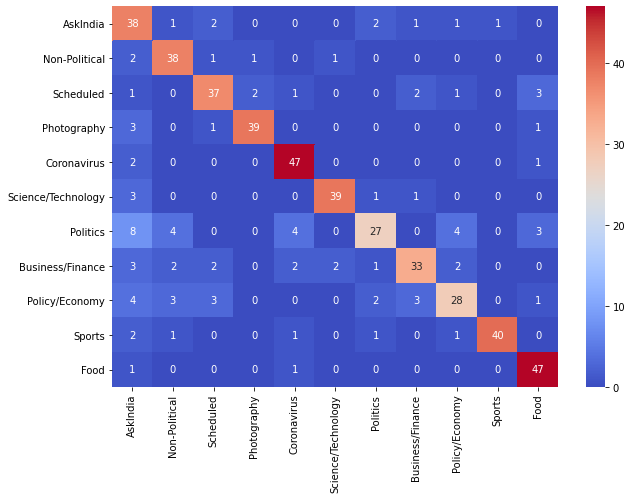

In [6]:
param_grid = {'alpha':[1e-2,1e-3,1e-4]  ,
              'max_iter':[100,200,300],
              'penalty':['l2','l1'],
              'loss': ['hinge']}  
svm = SGDClassifier() 
svm_cv = GridSearchCV(svm, param_grid, verbose = 1,n_jobs=8,refit=True) 

svm_cv.fit(X_train, y_train)



y_pred = svm_cv.best_estimator_.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print('accuracy %s' %acc)
print(classification_report(y_test, y_pred,target_names=flairs))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in flairs],
                  columns = [i for i in flairs])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap='coolwarm')

print("Tuned SVC Parameters: {}".format(svm_cv.best_params_)) 
print("Best score is {}".format(svm_cv.best_score_))

if best_acc<acc:
    best_acc = acc
    best_model = svm_cv.best_estimator_

In [7]:
print(best_model)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=300, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


## Analysis for the above model
---

1. The Linear SVM performed very well as compareed to the Naive Bayes model with accuracy of 80.09 %. The improved metrics for all flairs and the clean Confusion Matrix proves it's effectiveness


2. Except AskIndia, Politics flairs the model was effective in predicting the other flairs with f1 score of over 0.75.


3. It can correctly classify Photography,Food,Sprots,Non-Political,Coronavirus and Science/Technology flairs.


4. No of AskIndia flairs being misclassified is still a concern since the dataset is balanced. 

# Decision Tree Classifier
---

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   10.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   25.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   45.6s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 1440 out of 1440 | elapsed:  1.5min finished


accuracy 0.16470588235294117
                    precision    recall  f1-score   support

          AskIndia       0.25      0.09      0.13        46
     Non-Political       0.00      0.00      0.00        43
         Scheduled       0.00      0.00      0.00        47
       Photography       0.25      0.05      0.08        44
       Coronavirus       0.14      0.94      0.24        50
Science/Technology       0.09      0.07      0.08        44
          Politics       0.00      0.00      0.00        50
  Business/Finance       0.50      0.30      0.37        47
    Policy/Economy       0.20      0.25      0.22        44
            Sports       0.25      0.02      0.04        46
              Food       0.18      0.04      0.07        49

          accuracy                           0.16       510
         macro avg       0.17      0.16      0.11       510
      weighted avg       0.17      0.16      0.11       510

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth'

d:\anaconda3\envs\iiitd\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


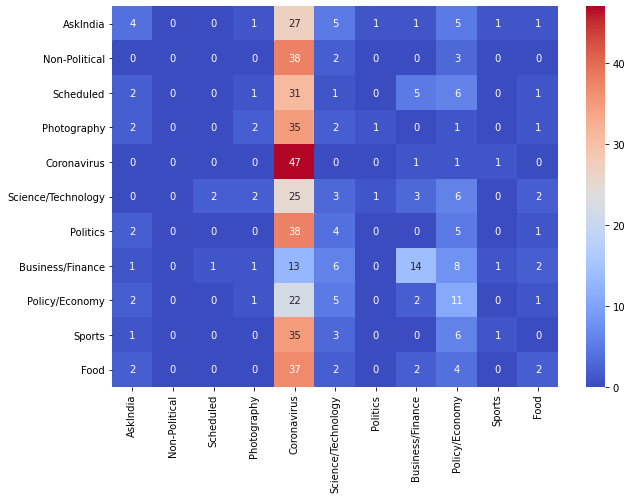

In [8]:
param_dist = {"max_depth": [3,4,5,6,7,8,9,10], 
              "max_features": [5,6,7,8,9,10], 
              "min_samples_leaf": [1,2,3], 
              "criterion": ["gini", "entropy"]} 

dt = DecisionTreeClassifier()

tree_cv = GridSearchCV(dt, param_dist, cv = 5,n_jobs=8,verbose=1,refit=True)
tree_cv.fit(X_train, y_train)



y_pred = tree_cv.best_estimator_.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print('accuracy %s' % acc)
print(classification_report(y_test, y_pred,target_names=flairs))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in flairs],
                  columns = [i for i in flairs])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap='coolwarm')

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

if best_acc<acc:
    best_acc = acc
    best_model = tree_cv.best_estimator_

## Analysis of the above model
---

1. The Decision Tree classifier performs badly as compared to all the other ML models tried with an accuracy of 16.47% only.


2. It cannot fit the data and can be seen from the classification report and Confusion Matrix above.


3. It cannot identify Non-Political and Scheduled flairs the scores of 0 depict this.


4. In many cases one of the precision/recall his very high but the other is low making the overall classifier very inefficient.

# Logistic Regressor model

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   29.0s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.6min finished


accuracy 0.8254901960784313
                    precision    recall  f1-score   support

          AskIndia       0.78      0.85      0.81        46
     Non-Political       0.86      0.86      0.86        43
         Scheduled       0.72      0.81      0.76        47
       Photography       0.93      0.89      0.91        44
       Coronavirus       0.96      0.90      0.93        50
Science/Technology       0.90      0.84      0.87        44
          Politics       0.63      0.78      0.70        50
  Business/Finance       0.89      0.72      0.80        47
    Policy/Economy       0.70      0.70      0.70        44
            Sports       1.00      0.85      0.92        46
              Food       0.84      0.88      0.86        49

          accuracy                           0.83       510
         macro avg       0.84      0.83      0.83       510
      weighted avg       0.84      0.83      0.83       510

Tuned SVC Parameters: {'alpha': 0.0001, 'loss': 'log', 'max_iter': 30

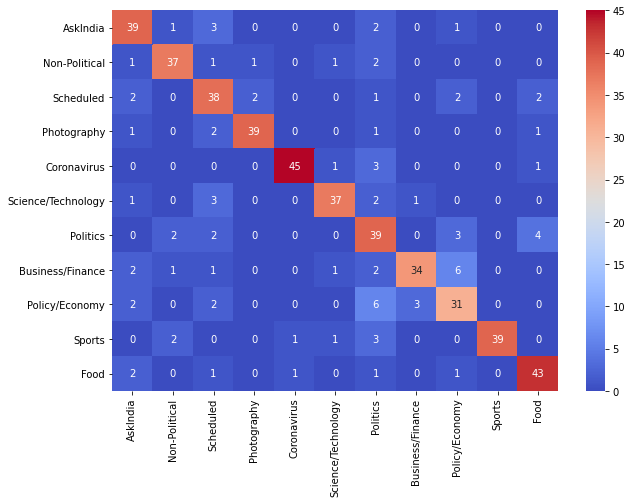

In [9]:
param_grid = {'alpha':[1e-2,1e-3,1e-4]  ,
              'max_iter':[100,200,300],
              'penalty':['l2','l1'],
              'loss': ['log']}  
log = SGDClassifier() 
log_cv = GridSearchCV(svm, param_grid, verbose = 1,n_jobs=8,refit=True) 

log_cv.fit(X_train, y_train)



y_pred = log_cv.best_estimator_.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print('accuracy %s' % acc)
print(classification_report(y_test, y_pred,target_names=flairs))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in flairs],
                  columns = [i for i in flairs])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap='coolwarm')

print("Tuned SVC Parameters: {}".format(log_cv.best_params_)) 
print("Best score is {}".format(log_cv.best_score_))

if best_acc<acc:
    best_acc = acc
    best_model = log_cv.best_estimator_

## Analysis of the above model
---


1. The model had a performance better than the upper 3 models with acc of 82.54%.


2. Model has performed well for all the flairs with a slight improvement in some flairs' prediction


3. The model has f1 score of >0.75 in all the flairs.

# Random Forest Classifier

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:  8.0min
[Parallel(n_jobs=8)]: Done 1440 out of 1440 | elapsed:  9.6min finished


accuracy 0.5901960784313726
                    precision    recall  f1-score   support

          AskIndia       0.70      0.65      0.67        46
     Non-Political       0.88      0.16      0.27        43
         Scheduled       0.88      0.32      0.47        47
       Photography       0.85      0.64      0.73        44
       Coronavirus       0.32      0.92      0.48        50
Science/Technology       0.82      0.73      0.77        44
          Politics       0.57      0.58      0.57        50
  Business/Finance       0.57      0.68      0.62        47
    Policy/Economy       0.51      0.61      0.56        44
            Sports       0.84      0.57      0.68        46
              Food       0.78      0.59      0.67        49

          accuracy                           0.59       510
         macro avg       0.70      0.59      0.59       510
      weighted avg       0.70      0.59      0.59       510

Tuned Random Forests Parameters: {'bootstrap': True, 'max_depth': 90,

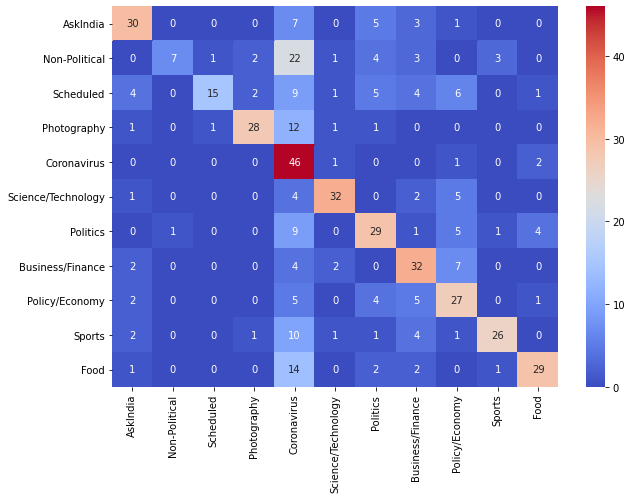

In [10]:
grid = {'bootstrap': [True],
    'max_depth': [80, 90, 100,110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 11],
    'n_estimators': [100, 200, 300,1000]}

rf = RandomForestClassifier()

rf_cv = GridSearchCV(rf, grid, cv = 5, n_jobs=8,verbose=1,refit=True)
rf_cv.fit(X_train, y_train)



y_pred = rf_cv.best_estimator_.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print('accuracy %s' % acc)
print(classification_report(y_test, y_pred,target_names=flairs))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in flairs],
                  columns = [i for i in flairs])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap='coolwarm')

print("Tuned Random Forests Parameters: {}".format(rf_cv.best_params_)) 
print("Best score is {}".format(rf_cv.best_score_))

if best_acc<acc:
    best_acc = acc
    best_model = rf_cv.best_estimator_

## Analysis of the above model
---


1. The accuracy of the model is 59.01% 


2. Best score was recorded for the Photography flair. The worst for the Scheduled.

# SVM with rbf kernel

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 10.7min
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed: 21.6min finished


accuracy 0.7588235294117647
                    precision    recall  f1-score   support

          AskIndia       0.52      0.74      0.61        46
     Non-Political       0.86      0.86      0.86        43
         Scheduled       0.70      0.60      0.64        47
       Photography       0.92      0.82      0.87        44
       Coronavirus       0.89      0.80      0.84        50
Science/Technology       0.85      0.75      0.80        44
          Politics       0.64      0.74      0.69        50
  Business/Finance       0.83      0.72      0.77        47
    Policy/Economy       0.60      0.68      0.64        44
            Sports       0.88      0.83      0.85        46
              Food       0.87      0.82      0.84        49

          accuracy                           0.76       510
         macro avg       0.78      0.76      0.76       510
      weighted avg       0.78      0.76      0.76       510

Tuned SVC Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best s

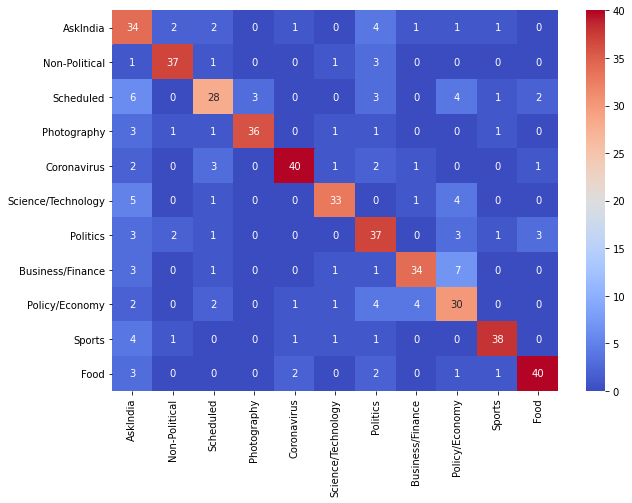

In [11]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf']}  
svc = SVC()  
svc_cv = GridSearchCV(svc, param_grid, verbose = 1,n_jobs=8,refit=True) 

svc_cv.fit(X_train, y_train)



y_pred = svc_cv.best_estimator_.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print('accuracy %s' % acc)
print(classification_report(y_test, y_pred,target_names=flairs))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in flairs],
                  columns = [i for i in flairs])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap='coolwarm')

print("Tuned SVC Parameters: {}".format(svc_cv.best_params_)) 
print("Best score is {}".format(svc_cv.best_score_))

if best_acc<acc:
    best_acc = acc
    best_model = svc_cv.best_estimator_

## Analysis of the above model
---


1. The model had accuracy of 75.88%.


2. Best scores recorded for the Photography, Coronavirus, Sports,Food.


3. AskIndia recorded the lowest f1 score.

# Neural Network

accuracy 0.5058823529411764
                    precision    recall  f1-score   support

          AskIndia       0.45      0.30      0.36        46
     Non-Political       0.39      0.33      0.35        43
         Scheduled       0.71      0.43      0.53        47
       Photography       0.79      0.50      0.61        44
       Coronavirus       0.72      0.52      0.60        50
Science/Technology       0.47      0.73      0.57        44
          Politics       0.35      0.48      0.40        50
  Business/Finance       0.57      0.51      0.54        47
    Policy/Economy       0.31      0.55      0.39        44
            Sports       0.53      0.76      0.62        46
              Food       0.82      0.47      0.60        49

          accuracy                           0.51       510
         macro avg       0.56      0.51      0.51       510
      weighted avg       0.56      0.51      0.51       510



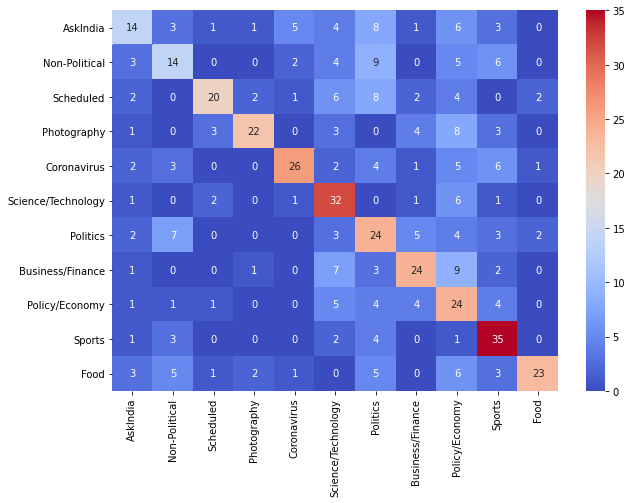

In [12]:
nn = MLPClassifier(max_iter=200,hidden_layer_sizes=(512,128,11),learning_rate_init=0.001)
nn.fit(X_train,y_train)

y_pred = nn.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print('accuracy %s' % acc)
print(classification_report(y_test, y_pred,target_names=flairs))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in flairs],
                  columns = [i for i in flairs])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap='coolwarm')

if best_acc<acc:
    best_acc = acc
    best_model = nn

## Analysis of the above model
---


1. The model had accuracy of 50.58%.

2. Highest F1 score was recorded for the Photography flair

# Checking with saved model

accuracy 0.8313725490196079
                    precision    recall  f1-score   support

          AskIndia       0.62      0.83      0.71        46
     Non-Political       0.83      0.88      0.85        43
         Scheduled       0.82      0.79      0.80        47
       Photography       0.93      0.91      0.92        44
       Coronavirus       0.85      0.94      0.90        50
Science/Technology       0.93      0.84      0.88        44
          Politics       0.82      0.72      0.77        50
  Business/Finance       0.85      0.70      0.77        47
    Policy/Economy       0.76      0.73      0.74        44
            Sports       0.98      0.89      0.93        46
              Food       0.85      0.92      0.88        49

          accuracy                           0.83       510
         macro avg       0.84      0.83      0.83       510
      weighted avg       0.84      0.83      0.83       510



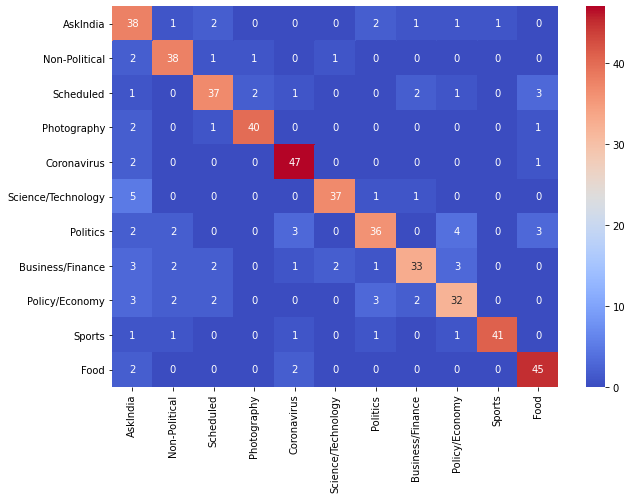

In [13]:
earlier_model = joblib.load("../models/finalmodel.sav")
y_pred = earlier_model.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print('accuracy %s' % acc)
print(classification_report(y_test, y_pred,target_names=flairs))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in flairs],
                  columns = [i for i in flairs])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap='coolwarm')

if best_acc<acc:
    best_acc = acc
    best_model = earlier_model

accuracy 0.8372549019607843
                    precision    recall  f1-score   support

          AskIndia       0.75      0.91      0.82        46
     Non-Political       0.92      0.84      0.88        43
         Scheduled       0.84      0.79      0.81        47
       Photography       0.91      0.91      0.91        44
       Coronavirus       0.98      0.88      0.93        50
Science/Technology       0.90      0.84      0.87        44
          Politics       0.68      0.80      0.73        50
  Business/Finance       0.78      0.77      0.77        47
    Policy/Economy       0.78      0.70      0.74        44
            Sports       0.89      0.87      0.88        46
              Food       0.86      0.90      0.88        49

          accuracy                           0.84       510
         macro avg       0.84      0.84      0.84       510
      weighted avg       0.84      0.84      0.84       510



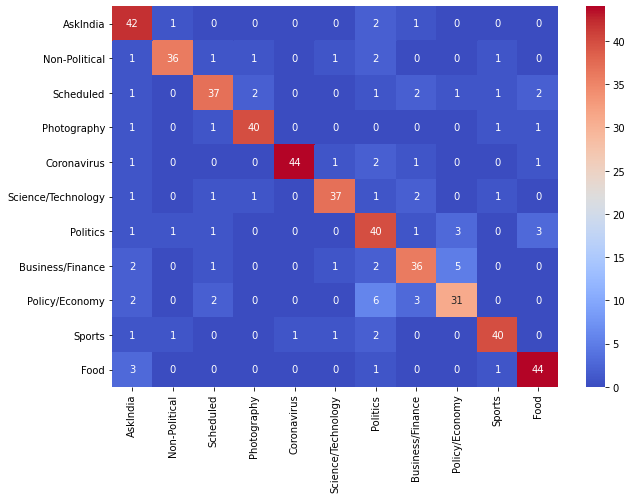

In [18]:
earlier_model2 = joblib.load("../models/finalmodel2.sav")
y_pred = earlier_model2.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print('accuracy %s' % acc)
print(classification_report(y_test, y_pred,target_names=flairs))
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in flairs],
                  columns = [i for i in flairs])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,cmap='coolwarm')

if best_acc<acc:
    best_acc = acc
    best_model = earlier_model2

# Saving the tfidfvectorizer, best model out of the above and the dataset split 

In [19]:
import os
if not os.path.exists('../models/'):
    os.mkdir('../models/')
joblib.dump(tfidfVectorizer,'../models/preprocessor.sav')
joblib.dump(best_model,'../models/finalmodel.sav')

if not os.path.exists('../train_testdata'):
    os.mkdir('../train_testdata')
    
joblib.dump(X_train,'../train_testdata/train_features.sav')
joblib.dump(X_test,'../train_testdata/test_features.sav')
joblib.dump(y_train,'../train_testdata/train_labels.sav')
joblib.dump(y_test,'../train_testdata/test_labels.sav')

['../train_testdata/test_labels.sav']